In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Analyzing Shipments

In [4]:
shipments = pd.read_csv("../data/processed/proc-shipments.csv")

In [6]:
shipments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               1289 non-null   object 
 1   Station Name (LEA)  1289 non-null   object 
 2   Requisition ID      1289 non-null   object 
 3   FSC                 1289 non-null   int64  
 4   NIIN                1289 non-null   object 
 5   Item Name           1289 non-null   object 
 6   UI                  1289 non-null   object 
 7   Quantity            1289 non-null   int64  
 8   Acquisition Value   1289 non-null   float64
 9   Date Shipped        1289 non-null   object 
 10  Justification       1289 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 110.9+ KB


In [8]:
shipments.head()

,State,Station Name (LEA),Requisition ID,FSC,NIIN,Item Name,UI,Quantity,Acquisition Value,Date Shipped,Justification
0,AK,AK DPS,2YTPEJ31536333,5180,015487634,"TOOL KIT,GENERAL MECHANIC'S",SE,8,2239.00,2023-06-15,MECHANICAL TOOL KIT WILL BE USED BY PUBLIC SAF...
1,AK,AK DPS,2YTPEJ31466335,8465,016046541,"BAG,DUFFEL",EA,80,39.90,2023-06-02,DUFFEL BAG WILL BE USED BY LAW ENFORCEMENT TO ...
2,AK,AK DPS,2YTPEJ31536340,8465,015236276,"FIELD PACK,LARGE,SE",SE,35,263.02,2023-06-15,LARGE FIELD PACK WILL BE USED BY LAW ENFORCEME...
3,AK,AK DPS,2YTPEJ31536341,8465,015236276,"FIELD PACK,LARGE,SE",SE,41,263.02,2023-06-15,LARGE FIELD PACK WILL BE USED BY LAW ENFORCEME...
4,AK,AK DPS,2YTPEJ31466342,8465,016416358,FIELD PACK,EA,7,78.95,2023-06-02,LARGE FIELD PACK WILL BE USED BY LAW ENFORCEME...


In [11]:
len(shipments["State"].unique())

34

Text(0.5, 1.0, 'Number of Shipments by State')

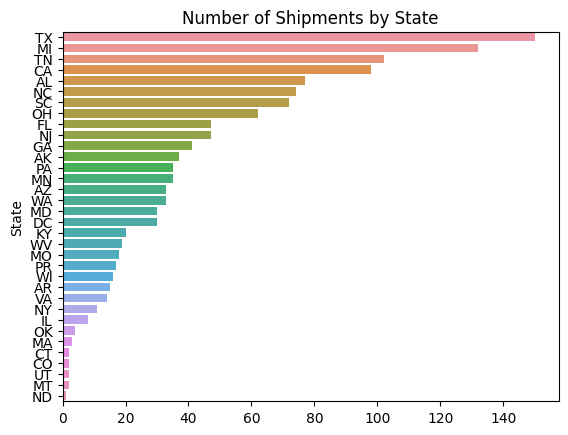

In [21]:
sns.barplot(x=shipments["State"].value_counts().values,y=shipments["State"].value_counts().index)
plt.title("Number of Shipments by State")

It looks like Texas has the most shipments; however, Florida looks to have the most expensive acquisitions followed by Tennesse and Texas.

In [31]:
shipments.groupby("State")["Acquisition Value"].agg("sum").sort_values(ascending=False)

State
FL    2073778.14
TN    1811331.77
TX    1277792.10
AL    1069919.34
PR    1052576.66
NC    1032167.26
MI     748576.13
NJ     666805.62
GA     651502.80
CA     536486.09
SC     496004.17
OH     367655.30
MT     308440.00
MN     285545.85
DC     270994.64
VA     243853.22
OK     235522.91
AR     161351.46
AZ     147083.88
MD     143372.06
MO     130902.94
WI     102728.65
WV      74784.82
PA      73195.53
IL      55495.00
CT      27640.16
WA      27506.39
NY      11784.56
CO       8441.98
AK       7557.37
MA       6986.25
KY       3859.76
UT       1498.39
ND        200.00
Name: Acquisition Value, dtype: float64

There looks to be a large acquisition on April 28th.

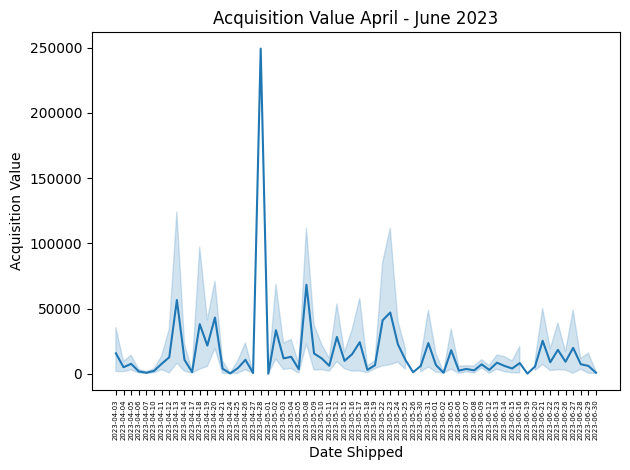

In [60]:
shipments_time = shipments[["Date Shipped", "Acquisition Value"]].sort_values(by="Date Shipped")
sns.lineplot(data=shipments_time, x="Date Shipped", y="Acquisition Value")
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=5)
plt.title("Acquisition Value April - June 2023")
plt.tight_layout()
plt.show()

The largest shipment is for the Coffee Country Sheriff Department in Georgia. The item acquired looks to be a boat which will be used to transport the departments dive team during search and rescue and used to patrol local lakes.

In [69]:
shipments.query("`Date Shipped` == '2023-04-28'")

,State,Station Name (LEA),Requisition ID,FSC,NIIN,Item Name,UI,Quantity,Acquisition Value,Date Shipped,Justification
359,GA,COFFEE COUNTY SHERIFF DEPT,2YTCMM31114171,1940,015267164,"BOAT,BRIDGE ERECTION,INBOARD ENGINE",EA,1,249187.0,2023-04-28,THE COFFEE COUNTY SHERIFF'S OFFICE WOULD USE T...


### Analyzing Cancellations

In [3]:
cancellations = pd.read_csv("../data/processed/proc-cancellations.csv")